<a href="https://colab.research.google.com/github/limited-fion/ee3-ml/blob/main/Fion_ML_non_linear_predictors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Non-linear Polynomial Transforms

## Classification

Previously, you have experimented with the perceptron learning algorithm (PLA) which finds a solution with a training error of zero when applied to linearly seperable data. However, you found that some classes are not linearly separable. In such cases, non-linear transforms may be applied to the data to make the prediction task easier. This will be illustrated in this tutorial, where we will be using again the Iris dataset.

Reminder - the Iris flowers Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris - Versicolor, Virginica and Setosa.

The machine learning task in this exercise is to classify samples into different species. The code below implements a polynomial transformation of the original features.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets 
from ipywidgets import interact, interact_manual
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

This code implements polynomial transformation of features.

\begin{equation}
z_i = c_i x_{i}^{d_i} + c_i x_{i}^{d_{i-1}}
\end{equation}
\begin{equation}
z = [z_1, z_2]
\end{equation}

Use the sliders below to choose 2 out of 4 available features, and tranform them with polynomial of degree $d$ and coefficient $c$.

By changing featuresx and featuresy you are chosing which of the four features are displayed on axis x and y. These original features are displayed in first figure.

In [3]:
from sklearn.datasets import load_iris

@interact

def plot_reg(featurex =  (0,3,1), featurey = (0,3,1), d = (-8,10,1),c =(-8,10,1)):
  iris = load_iris()
  features = iris.data.T

  plt.xlabel(iris.feature_names[featurex])
  plt.ylabel(iris.feature_names[featurey])
  plt.scatter(features[featurex][50:], features[featurey][50:], alpha=0.4,
              s=100, c=iris.target[50:], cmap='seismic')


  features[featurex] = c*features[featurex]**d + c*features[featurex]**(d-1)
  features[featurey] = c*features[featurey]**d + c*features[featurey]**(d-1)
  # plt.legend(iris.target_names)
  plt.figure()
  plt.scatter(features[featurex][50:], features[featurey][50:], alpha=0.4,
              s=100, c=iris.target[50:], cmap='seismic')
  plt.xlabel(iris.feature_names[featurex])
  plt.ylabel(iris.feature_names[featurey])
  # plt.legend(iris.target_names)

interactive(children=(IntSlider(value=1, description='featurex', max=3), IntSlider(value=1, description='featu…

In [4]:
def predict(W, X):
        """ Return class label after each setp """
        return np.where(net_input(W, X) >= 0.0, 1, -1)      

def net_input(W, X):
        """ Calculate net input """
        return np.dot(X, W[1:]) + W[0]

def plot_boundary(W,X):
        """Function to plot the boundary defined by the weights. Given equation."""
        """w0 + w1*x1 + w2*x2 = 0, used to generate the line."""
        x_vals = []
        y_vals = []
        for i in range(0,10):
            x_vals.append(i) 
            result = (-1)*(W[1]*i + W[0])/W[2] #Uses the equation to find y_vals using x_vals as input and weights. 
            y_vals.append(result)
            
    # This part here define the x-axis and y-axis style according to the data we are using (Iris data).
    # Hence: you can edit the names depends on the features/labels you are using 
         
        plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='Setosa')
        plt.scatter(X[50:100,0],X[50:100,1],color='blue',marker='o',label='Virginica') 
        plt.title("Sepal Length vs Petal Length")
        plt.xlabel('Sepal Length')    
        plt.ylabel('Petal Length')
        plt.legend(loc='upper left')
        plt.plot(x_vals,y_vals, 'black') #Plot using found values that form the line. 
        plt.show()

def plot_errors(error):
    plt.plot(range(1, len(error) + 1), error,marker='o')
    plt.xlabel('Iterations')
    plt.ylabel('Number of misclassifications')
    plt.show()  

In [5]:
def fit(n_iter, X, y):
        W = np.zeros(1 + X.shape[1])
        errors_ = []       
        for i in range(n_iter):
            for j, (xi, target) in enumerate(zip(X,y)):
                update = target - predict(W, xi)
                W[1:] += update*xi
                W[0] += update
            # errors on whole dataset 
            errors = 0
            for j, (xi, target) in enumerate(zip(X, y)):
                if predict(W, xi) != target:
                    errors += 1
            # -------------------------------------------
            errors_.append(errors) 
            i += 1
            print ("Iteration: ", i)
            print("Weights: ", W)
            # plot_boundary(W,X) #When weights are updated we plot the boundary
        plot_errors(errors_)
            

# Coursework

## Task 1: 

Combining the code above with the one from the Perceptron exercise, use the pocket algorithm to train 3 linear classifiers. Each of the classifiers should use all 4 available features and be able to discern a single species of iris from the others. After training, you should combine the three classifiers into a single multiclass classifier; the manner in which you do this is up to you. Find the feature transformation which leads to the best overall classification results.

In your report:

- Report results for the best performance.
- Include model parameters, a figure with the training error vs iterations of the pocket algorithm and list 10 examples of misclassified data: 5 of false negatives, and 5 of false positives (only list features, you can include 1 with an image). If you do not have 10 misclassified datapoints, list those you have.




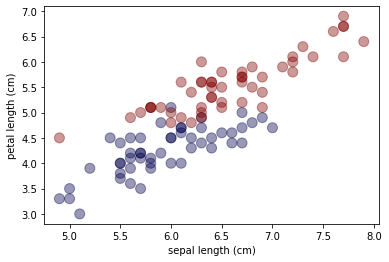

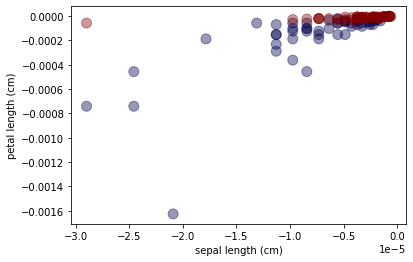

In [6]:
plot_reg(0,2,-8,-8)

In [7]:
from pandas.plotting import scatter_matrix

iris = load_iris()
iris_data = pd.DataFrame(data=iris['data'],columns=iris['feature_names'])
iris_data["target"] = iris['target']

setosa_label = iris_data.iloc[0:50,4].values
virginica_label = iris_data.iloc[100:150,4].values
versicolor_label = iris_data.iloc[50:100,4].values

X_setosa = iris_data.iloc[0:50, :]
X_virginica = iris_data.iloc[100:150, :]
X_versicolor = iris_data.iloc[50:100, :]

labels = np.concatenate((setosa_label, virginica_label, versicolor_label))
X = np.concatenate((X_setosa, X_virginica, X_versicolor))

Iteration:  1
Weights:  [ -2.  -12.6  -6.6 -12.   -5.   -4. ]
Iteration:  2
Weights:  [  0.   -5.2  -0.2 -18.4  -9.2  -8. ]
Iteration:  3
Weights:  [  2.    5.    6.8 -15.6  -8.8  -8. ]
Iteration:  4
Weights:  [  2.    5.    6.8 -15.6  -8.8  -8. ]
Iteration:  5
Weights:  [  2.    5.    6.8 -15.6  -8.8  -8. ]


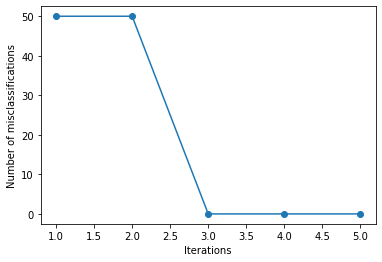

In [8]:
# classify setosa and others

y1 = np.where(labels == 0, 1, -1) 

n_iter=5
fit(n_iter, X, y1)

Iteration:  1
Weights:  [ 0.   3.8 -0.6  6.6  2.4  2. ]
Iteration:  2
Weights:  [ 0.   7.6 -1.2 13.2  4.8  4. ]
Iteration:  3
Weights:  [ 0.  10.  -2.6 15.   4.8  4. ]
Iteration:  4
Weights:  [-2.   1.2 -9.8  9.6  2.2  2. ]
Iteration:  5
Weights:  [-2.00000000e+00  2.60000000e+00 -1.00000000e+01  7.00000000e+00
 -1.77635684e-15  0.00000000e+00]
Iteration:  6
Weights:  [ -2.    4.  -10.2   4.4  -2.2  -2. ]
Iteration:  7
Weights:  [ 0.  18.2 -4.  10.8 -1.4 -2. ]
Iteration:  8
Weights:  [ -2.   12.2 -10.6  14.6   0.6   0. ]
Iteration:  9
Weights:  [ -2.   16.2 -11.4  18.2   1.    0. ]
Iteration:  10
Weights:  [ -4.   11.  -16.6  22.2   2.8   2. ]
Iteration:  11
Weights:  [ -4.   13.4 -18.   24.    2.8   2. ]
Iteration:  12
Weights:  [ -6.    4.6 -25.2  18.6   0.2   0. ]
Iteration:  13
Weights:  [ -6.    6.  -25.4  16.   -2.   -2. ]
Iteration:  14
Weights:  [ -4.   18.6 -19.8  20.6  -1.6  -2. ]
Iteration:  15
Weights:  [ -6.    9.8 -27.   15.2  -4.2  -4. ]
Iteration:  16
Weights:  [ -6.   

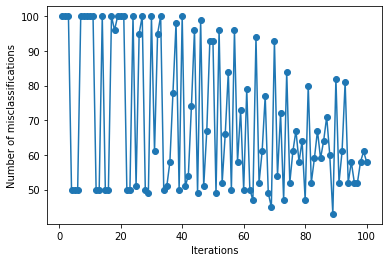

In [9]:
# classify virginica and others

y2 = np.where(labels == 1, 1, -1) 

n_iter=100
fit(n_iter, X, y2)

Iteration:  1
Weights:  [ -2.  -11.6  -6.8  -0.2   1.8   2. ]
Iteration:  2
Weights:  [ -2.  -13.   -6.6   2.4   4.    4. ]
Iteration:  3
Weights:  [ -2.  -14.4  -6.4   5.    6.2   6. ]
Iteration:  4
Weights:  [ -2.  -15.8  -6.2   7.6   8.4   8. ]
Iteration:  5
Weights:  [ -2.  -17.2  -6.   10.2  10.6  10. ]
Iteration:  6
Weights:  [ -2.  -18.6  -5.8  12.8  12.8  12. ]
Iteration:  7
Weights:  [ -2.  -20.   -5.6  15.4  15.   14. ]
Iteration:  8
Weights:  [ -2.  -19.8  -6.   17.8  16.4  16. ]
Iteration:  9
Weights:  [ -4.  -30.6 -12.4  11.   13.8  16. ]
Iteration:  10
Weights:  [ -4.  -32.  -12.2  13.6  16.   18. ]
Iteration:  11
Weights:  [ -4.  -33.4 -12.   16.2  18.2  20. ]
Iteration:  12
Weights:  [ -4.  -34.8 -11.8  18.8  20.4  22. ]
Iteration:  13
Weights:  [ -4.  -36.2 -11.6  21.4  22.6  24. ]
Iteration:  14
Weights:  [ -4.  -37.6 -11.4  24.   24.8  26. ]
Iteration:  15
Weights:  [ -4.  -39.  -11.2  26.6  27.   28. ]
Iteration:  16
Weights:  [ -4.  -40.4 -11.   29.2  29.2  30. ]
I

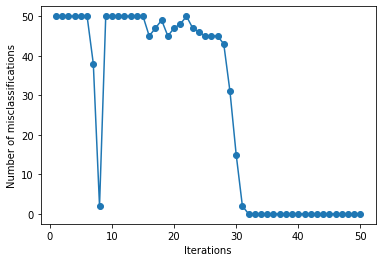

In [10]:
# classify virginica and others

y3 = np.where(labels == 2, 1, -1) 

n_iter=50
fit(n_iter, X, y3)

**3 linear classifiers done, now combining into multiclass classifier**

1st : Weights:  [  2.    5.    6.8 -15.6  -8.8  -8. ]

2nd : Weights:  [ -30.    47.  -100.4   44.8  -35.4  -54. ]

3rd : Weights:  [ -4.  -59.8 -22.4  54.6  46.6  62. ]

In [11]:
W1 = [ 2, 5,  6.8, -15.6, -8.8, -8 ]
W2 = [ -30, 47, -100.4, 44.8, -35.4, -54 ]
W3 = [ -4, -59.8, -22.4, 54.6, 46.6, 62 ]

def normalize(W):
  return W/np.linalg.norm(W)

W1 = normalize(W1)
W2 = normalize(W2)
W3 = normalize(W3)

print(np.argmax(model(X,W1)))
print(np.argmax(model(X,W2)))
print(np.argmax(model(X,W3)))

14
68
50


In [16]:
res = [ net_input(W1, X), net_input(W2, X), net_input(W3, X) ]

def predict3(res1, res2, res3):
        """ Return class label after each setp """
        res1 = res[0]
        res2 = res[1]
        res3 = res[2]
        if (res1 > res2 || res1 > res3)
          return np.where(labels == 1, 0, -1)
        else if (res3 > res2)
        return np.where(net_input(W, X) >= 0.0, 1, -1)      


print(res)

[array([ 1.29146301,  1.08632087,  1.17583744,  0.97535762,  1.29985519,
        1.18795948,  1.10217276,  1.16371541,  0.93805905,  1.08632087,
        1.35207319,  1.04435998,  1.10403769,  1.2056763 ,  1.75862761,
        1.56187765,  1.47888833,  1.25043458,  1.26721894,  1.27281372,
        1.11149741,  1.20008151,  1.49753761,  0.88677352,  0.82616334,
        0.96416805,  1.00892634,  1.2420424 ,  1.28307083,  0.9576408 ,
        0.94924862,  1.17490498,  1.47329354,  1.60663593,  1.04529244,
        1.31850447,  1.45744165,  1.31757201,  1.04249505,  1.18702701,
        1.29985519,  0.80285173,  1.10590262,  0.95857327,  0.94085645,
        1.02198084,  1.24110994,  1.07979362,  1.32876158,  1.20474383,
       -3.52751232, -2.93353258, -3.1992849 , -3.07619962, -3.30745076,
       -3.59185236, -2.68829448, -3.35220904, -3.25523276, -3.29532872,
       -2.65286084, -2.93912737, -2.97829087, -2.98854798, -3.10697094,
       -2.94472216, -2.92514041, -3.42867111, -3.99560938, -2.8

## Task 2: k-Fold Cross-Validation

Choose one of your three linear classifiers from Task 1, use k-Fold Cross-Validation to estimate the out of sample performance of the selected classifier. Explore the effect of different $k$ values on the model performance and discuss the results, use $k =3$, $k = 5$, and $k = 10$. In your report:

- include the code of the k-fold validation.
- Discuss the results.

## Regression

In this exercise you will experiment with a regression using non-linear polynomial transform of features. We will use the boston house-prices dataset again.

The figure below display the feature values on x axis and their transformed values on y axis in green. The labels i.e., outputs of the target function are displayed in blue, which is median value of owner-occupied homes in $1000’s.

The code below transforms the selected 1 out of 13 features with degree $d$ and coefficient $c$ according to

\begin{equation}
z_i = c_x x_{x}^{d_x} + c_{x_1} x_{x}^{d_{x-1}} + c_{x_2} x_{x}^{d_{x-2}}
\end{equation}

In [13]:
import pandas as pd 
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import metrics
@interact

def plot_reg(featurex = (0,12,1),d_x = (-8,10,1),c_x_0 =(-8,10,0.1),c_x_1 =(-8,10,0.1),c_x_2 =(-8,10,0.1),bias =(-20,40,1)):
  boston = load_boston()
  features = boston.data.T
  ofeatures = features.copy()

  features[featurex] = c_x_0*features[featurex]**d_x + c_x_1*features[featurex]**(d_x-1)+c_x_2*features[featurex]**(d_x-2)+bias

  Z=features[featurex:(featurex+1)]
  ZT=np.transpose(Z)
  X_train, X_test, y_train, y_test = train_test_split(ZT, boston.target, test_size=0.2, random_state=0)
  lr = LinearRegression()
  lr.fit(X_train, y_train)
  y_tr_pred = lr.predict(X_train)
  y_te_pred = lr.predict(X_test)

  plt.figure(figsize = (15,5))
  plt.scatter(X_train, y_train, alpha=0.4,s=100, c='blue')
  #w = lr.coef_
  #b=lr.intercept_
  #plt.scatter(X_train, b+w*X_train,  alpha=0.4,s=100, c='red')
  plt.scatter(X_train, y_tr_pred,  alpha=0.4,s=100,c='green')
  plt.scatter(X_test, y_te_pred,  alpha=0.4,s=100,c='red')
  plt.xlabel(boston.feature_names[featurex])
  plt.ylabel('MEDV') 
  df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_te_pred.flatten()})
  print(df)
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_te_pred))  
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_te_pred))  
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_te_pred)))

interactive(children=(IntSlider(value=6, description='featurex', max=12), IntSlider(value=1, description='d_x'…

# Coursework

## Task 3: 

Find 1 of the 13 features, its transformation with polynomial, degrees and coefficients that best approximate the target output. You can change the non-linear function in the code and range of values for the parameters. In your report:

- Report your formula, parameters, errors and figures in the coursework report.

## Task 4:

Modify the code above to make use of all 13 features simultaneously, their transformation with polynomials, degrees and coefficients that minimize the regression error. In your report:

- Report your formula, parameters, errors and figures in the coursework report.
